In [8]:
import json
import numpy as np
import os
import random

In [9]:
def read_json_file(file_path):
    global json_file
    try:
        json_file = open(file_path, "r")
        return json.load(json_file)
    finally:
        if json_file:
            print("close file...")
            json_file.close()

def get_predicate_count(select_captions):
    predicate_count = {}
    for index in select_captions:
        predicate = captions[index]['predicate']
        if predicate in predicate_count:
            predicate_count[predicate] += 1
        else:
            predicate_count[predicate] = 1
    return predicate_count

In [10]:

def get_statistics(ranks):
    total = 0
    # correct count
    very_correct = very_wrong = same_order = all_active = all_passive = tp_fa = ta_fp= 0
    ta_tp = fa_fp = 0

    for r, c in ranks:
        total += c
        if int(r[0]) < 3 and int(r[1]) < 3:
            very_correct += c
        if int(r[2]) < 3 and int(r[3]) < 3:
            very_wrong += c
        if int(r[0]) < int(r[2]):
            all_active += c
        if int(r[1]) < int(r[3]):
            all_passive += c
        if int(r[1]) < int(r[2]):
            tp_fa += c
    
        if int(r[0]) + int(r[1]) == 5:
            same_order += c
        
        if int(r[0]) < int(r[3]):
            ta_fp += c
        
        if int(r[0] < r[1]):
            ta_tp += c
        
        if int(r[2] < r[3]):
            fa_fp += c
     
    print("very_correct:", np.round(very_correct / total, 4), "count:", very_correct)
    print("very_wrong:", np.round(very_wrong / total, 4), "count:", very_wrong)
    print("same_order:", np.round(same_order / total, 4), "count:", same_order)
    print("all_active:", np.round(all_active / total, 4), "count:", all_active)
    print("all_passive:", np.round(all_passive / total, 4), "count:", all_passive)
    print("tp_fa:", np.round(tp_fa / total, 4), "count:", tp_fa)
    print("ta_fp:", np.round(ta_fp / total, 4), "count:", ta_fp)
    print("ta_tp:", np.round(ta_tp / total, 4), "count:", ta_tp)
    print("fa_fp:", np.round(fa_fp / total, 4), "count:", fa_fp)

# 1. Statistics

In [11]:
dir = "output/ranks"
for file in os.listdir(dir):
    print(file)
    ranks = read_json_file(os.path.join(dir, file))
    get_statistics(ranks)
    print()

active_passive_captions_gold_ranks.txt
close file...
very_correct: 0.0917 count: 42
very_wrong: 0.0459 count: 21
same_order: 0.5131 count: 235
all_active: 0.4389 count: 201
all_passive: 0.6026 count: 276
tp_fa: 0.6507 count: 298
ta_fp: 0.4039 count: 185
ta_tp: 0.3646 count: 167
fa_fp: 0.4236 count: 194

active_passive_captions_size_filter_ranks.txt
close file...
very_correct: 0.0759 count: 71
very_wrong: 0.0578 count: 54
same_order: 0.5102 count: 477
all_active: 0.4556 count: 426
all_passive: 0.5668 count: 530
tp_fa: 0.6642 count: 621
ta_fp: 0.3636 count: 340
ta_tp: 0.339 count: 317
fa_fp: 0.384 count: 359

active_passive_captions_ranks.txt
close file...
very_correct: 0.0705 count: 79
very_wrong: 0.0544 count: 61
same_order: 0.5183 count: 581
all_active: 0.4505 count: 505
all_passive: 0.5772 count: 647
tp_fa: 0.669 count: 750
ta_fp: 0.3533 count: 396
ta_tp: 0.3301 count: 370
fa_fp: 0.3782 count: 424

active_passive_captions_size_filter_gruen_strict_ranks.txt
close file...
very_correct:

# 2. Case Analysis

Analyze examples from Gold Gruen dataset

In [12]:
# Read files
import utils_show as utils
clip_results = utils.read_json_file("output/results/active_passive_captions_gold_gruen_strict_clip_result.txt")
captions = utils.get_caption_dict('/Users/xinyichen/Desktop/Thesis/Dataset_Construction_0215/output/active_passive_captions_gold_gruen_strict.txt')

close file...
close file...


In [13]:
index_rank_dict = {}
for result in clip_results:
    index = result['index']
    index_rank_dict[index] = {"rank": result['rank'], "scores":result['scores']}

In [14]:
# Create a dictionary for rank order and list of caption cases whose CLIP results 
# take the rank order(e.g.rank_index[3124] = [1,23,..], the rank order of the 4 captions whose index is 1 or 23\
# are rank 3,1,2,4)
rank_index = {}
for result in clip_results:
    index = result['index']
    rank = ''.join([str(r) for r in result['rank']])
    if rank in rank_index:
        rank_index[rank].append(index)
    else:
        rank_index[rank] = [index]
for r, img_list in rank_index.items():
    print(f"{r}:", len(img_list), end = ', ')

4132: 51, 3142: 23, 2413: 12, 1342: 13, 4231: 22, 1423: 14, 4123: 22, 2314: 17, 3412: 4, 4213: 9, 3241: 26, 3214: 18, 4321: 4, 1324: 9, 1243: 11, 2341: 12, 2143: 7, 1234: 7, 3124: 9, 2134: 5, 1432: 5, 2431: 6, 4312: 4, 3421: 1, 

## 2.1 All Correct

In [15]:
all_correct = rank_index['1243'] + rank_index['1234'] + rank_index['2143'] + rank_index['2134']

In [16]:
# Statistics on predicate count in all correct cases
get_predicate_count(all_correct)

{'teaches': 3,
 'watches': 5,
 'holds': 11,
 'helps': 4,
 'carries': 1,
 'holds up': 1,
 'feeds': 2,
 'takes picture of': 1,
 'interviews': 1,
 'looks at': 1}

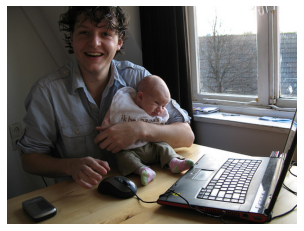

index: 87
the man holds the baby
the baby is held by the man
the baby holds the man
the man is held by the baby
{'rank': [1, 2, 3, 4], 'scores': [[0.7135009765625, 0.712890625, 0.7086181640625, 0.7073974609375]]}


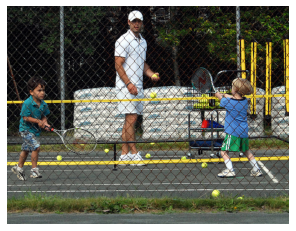

index: 366
the man teaches the boy
the boy is taught by the man
the boy teaches the man
the man is taught by the boy
{'rank': [2, 1, 3, 4], 'scores': [[0.61187744140625, 0.61859130859375, 0.6109619140625, 0.6011962890625]]}


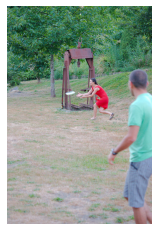

index: 245
the man watches the woman
the woman is watched by the man
the woman watches the man
the man is watched by the woman
{'rank': [2, 1, 4, 3], 'scores': [[0.55694580078125, 0.56884765625, 0.5535888671875, 0.55419921875]]}


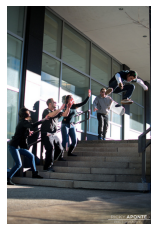

index: 197
the reaching man watches the man
the man is watched by the reaching man
the man watches the reaching man
the reaching man is watched by the man
{'rank': [2, 1, 4, 3], 'scores': [[0.54473876953125, 0.55084228515625, 0.5328369140625, 0.53497314453125]]}


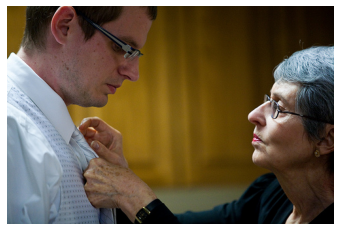

index: 254
the woman helps the man
the man is helped by the woman
the man helps the woman
the woman is helped by the man
{'rank': [1, 2, 4, 3], 'scores': [[0.5950927734375, 0.5914306640625, 0.5731201171875, 0.5865478515625]]}


In [17]:
selected = random.sample(all_correct, 5)

for index in selected:
    utils.show_example_by_index(index, captions)
    print(index_rank_dict[index])

## 2.2 All wrong

In [18]:
all_wrong = rank_index['4321'] + rank_index['3421'] + rank_index['3412'] + rank_index['4312']
print("all wrong count:", len(all_wrong))
# Statistics on predicate count in all wrong cases
get_predicate_count(all_wrong)

all wrong count: 13


{'helps': 1,
 'holds': 4,
 'observes': 1,
 'teaches': 2,
 'touches': 1,
 'feeds': 1,
 'watches': 3}

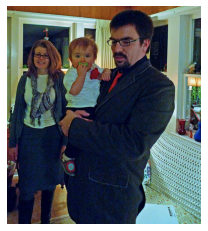

index: 120
the man holds the toddler
the toddler is held by the man
the toddler holds the man
the man is held by the toddler
{'rank': [3, 4, 1, 2], 'scores': [[0.6561279296875, 0.6475830078125, 0.6573486328125, 0.6573486328125]]}


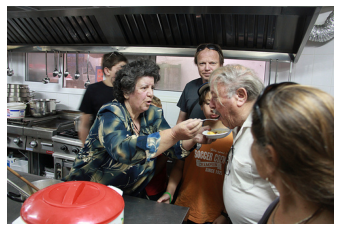

index: 441
the woman feeds the man
the man is fed by the woman
the man feeds the woman
the woman is fed by the man
{'rank': [3, 4, 1, 2], 'scores': [[0.631103515625, 0.6256103515625, 0.6451416015625, 0.6353759765625]]}


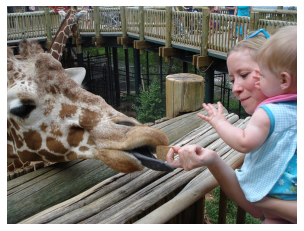

index: 17
the baby touches the mom
the mom is touched by the baby
the mom touches the baby
the baby is touched by the mom
{'rank': [3, 4, 1, 2], 'scores': [[0.6475830078125, 0.6463623046875, 0.650634765625, 0.650634765625]]}


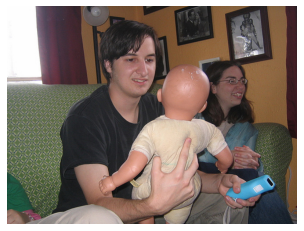

index: 307
the boy holds the plastic baby
the plastic baby is held by the boy
the plastic baby holds the boy
the boy is held by the plastic baby
{'rank': [4, 3, 2, 1], 'scores': [[0.8514404296875, 0.8563232421875, 0.858154296875, 0.872802734375]]}


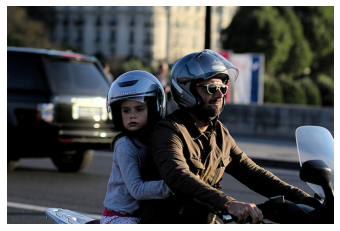

index: 206
the girl holds the man
the man is held by the girl
the man holds the girl
the girl is held by the man
{'rank': [3, 4, 1, 2], 'scores': [[0.57952880859375, 0.57525634765625, 0.59967041015625, 0.58502197265625]]}


In [31]:
# selected = selected = random.sample(all_wrong, 5)
selected =  [120, 441, 17, 307, 206]
for index in selected:
    utils.show_example_by_index(index, captions)
    print(index_rank_dict[index])

## 2.3 Prefer active

In [20]:
prefer_active = rank_index['1324'] + rank_index['1423'] + rank_index['2314'] + rank_index['2413']
print(len(prefer_active))
get_predicate_count(prefer_active)

52


{'holds': 25,
 'feeds': 1,
 'gives a kiss': 1,
 'points at': 1,
 'holds onto': 2,
 'touches': 2,
 'looks at': 5,
 'trains': 1,
 'pulls': 1,
 'kisses': 1,
 'helps': 2,
 'dresses': 2,
 'watches': 3,
 'grabs': 2,
 'ties': 1,
 'smiles at': 1,
 'embraces': 1}

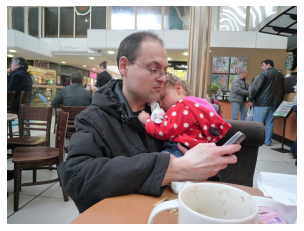

index: 416
the man holds the baby
the baby is held by the man
the baby holds the man
the man is held by the baby
{'rank': [1, 3, 2, 4], 'scores': [[0.6695556640625, 0.6488037109375, 0.6597900390625, 0.6365966796875]]}


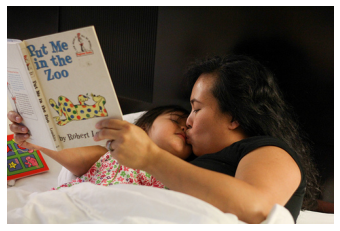

index: 272
the woman gives a kiss the daughter
the daughter is gave a kiss by the woman
the daughter gives a kiss the woman
the woman is gave a kiss by the daughter
{'rank': [1, 3, 2, 4], 'scores': [[0.6585693359375, 0.6427001953125, 0.6463623046875, 0.6427001953125]]}


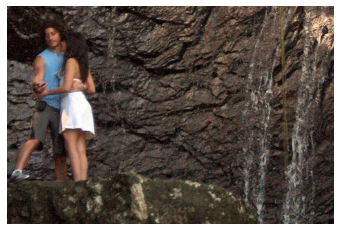

index: 440
the man embraces the lady
the lady is embraced by the man
the lady embraces the man
the man is embraced by the lady
{'rank': [2, 4, 1, 3], 'scores': [[0.57830810546875, 0.56488037109375, 0.57891845703125, 0.56732177734375]]}


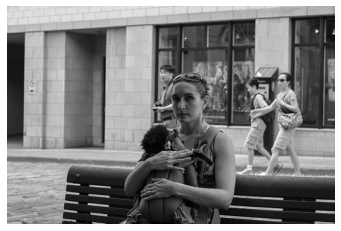

index: 306
the woman holds the baby
the baby is held by the woman
the baby holds the woman
the woman is held by the baby
{'rank': [1, 3, 2, 4], 'scores': [[0.733642578125, 0.72265625, 0.72265625, 0.7135009765625]]}


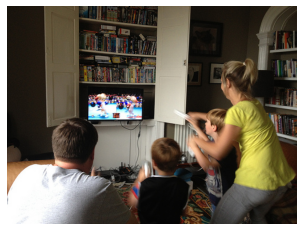

index: 262
the mom helps the boy
the boy is helped by the mom
the boy helps the mom
the mom is helped by the boy
{'rank': [2, 4, 1, 3], 'scores': [[0.5108642578125, 0.48492431640625, 0.53924560546875, 0.50933837890625]]}


In [21]:
selected = selected = random.sample(prefer_active, 5)

for index in selected:
    utils.show_example_by_index(index, captions)
    print(index_rank_dict[index])

## 2.4 Prefer Passive

In [22]:
prefer_passive = rank_index['3142']+ rank_index['4132']+ rank_index['3241']+ rank_index['4132']

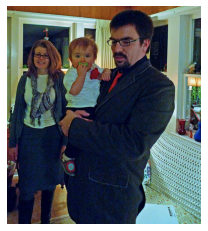

index: 120
the man holds the toddler
the toddler is held by the man
the toddler holds the man
the man is held by the toddler
{'rank': [3, 4, 1, 2], 'scores': [[0.6561279296875, 0.6475830078125, 0.6573486328125, 0.6573486328125]]}


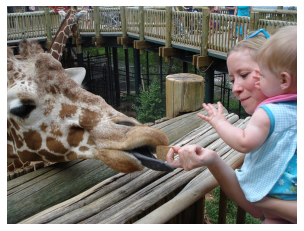

index: 17
the baby touches the mom
the mom is touched by the baby
the mom touches the baby
the baby is touched by the mom
{'rank': [3, 4, 1, 2], 'scores': [[0.6475830078125, 0.6463623046875, 0.650634765625, 0.650634765625]]}


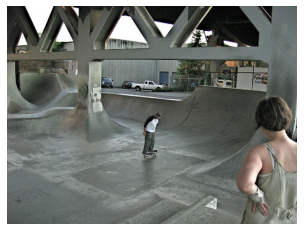

index: 150
the woman watches the man
the man is watched by the woman
the man watches the woman
the woman is watched by the man
{'rank': [4, 3, 1, 2], 'scores': [[0.50933837890625, 0.51422119140625, 0.52093505859375, 0.51422119140625]]}


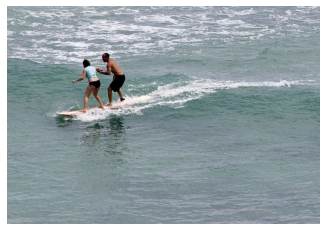

index: 376
the man teaches the woman
the woman is taught by the man
the woman teaches the man
the man is taught by the woman
{'rank': [4, 3, 2, 1], 'scores': [[0.50079345703125, 0.50201416015625, 0.50689697265625, 0.5120849609375]]}


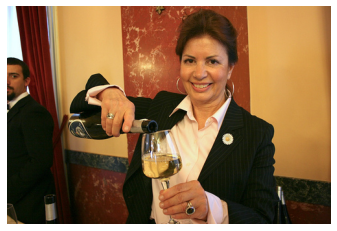

index: 175
the man watches the woman
the woman is watched by the man
the woman watches the man
the man is watched by the woman
{'rank': [4, 3, 1, 2], 'scores': [[0.48248291015625, 0.49774169921875, 0.506591796875, 0.50201416015625]]}


In [23]:
selected = selected = random.sample(all_wrong, 5)

for index in selected:
    utils.show_example_by_index(index, captions)
    print(index_rank_dict[index])

# 3. Error Analysis

All wrong: 
Prefer active
91, 272,47, 593

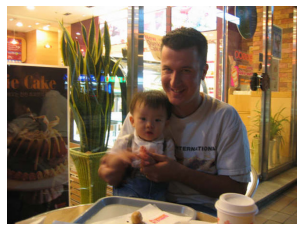

index: 12
the man holds the son
the son is held by the man
the son holds the man
the man is held by the son


{'index': 17,
 'rank': [3, 4, 1, 2],
 'scores': [[0.6475830078125,
   0.6463623046875,
   0.650634765625,
   0.650634765625]]}

In [24]:
utils.show_example_by_index(12, captions)
clip_results[12]